In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Read in the data and evaluate what needs to be cleaned

In [2]:
vis1920_i = pd.read_excel('../Data/Vis1920.xlsx')

In [3]:
vis1920_i.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,ACTIVITIES>>,NaN,REST,INN ROOMS,NaN,NaN,CABINS,NaN,NaN,GROUPCAMPS/LODGING,...,TOTAL,CAMPSITES,NaN,NaN,MARINAS,NaN,NaN,NaN,PROGRAMMING,NaN
1,PARKS,VISITORS,GUESTS,AVAIL,SOLD,OCCUP,AVAIL,SOLD,OCCUP,GUESTS,...,GOLFERS,AVAIL,SOLD,OCCUP,AVAIL,SOLD,OCCUP,SWIMMING,HELD,ATTEND
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BICENTENNIAL CAPITOL MALL,39353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,3114
4,BIG CYPRESS TREE,1690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


Pulled the multi-index header code from the UN_GDP project to remove the "Unnamed" header row and make rows at index 0 and 1 the headers.

In [4]:
vis1920= pd.read_excel('../Data/Vis1920.xlsx',skiprows = 1, header=[0,1], sheet_name = 0)
vis1819= pd.read_excel('../Data/Vis1819.xlsx',skiprows = 1, header=[0, 1], sheet_name = 0)
vis1718= pd.read_excel('../Data/Vis1718.xlsx',skiprows = 1, header=[0, 1], sheet_name = 0)
vis1617= pd.read_excel('../Data/Vis1617.xlsx',skiprows = 1, header=[0, 1], sheet_name = 0)
vis1516= pd.read_excel('../Data/Vis1516.xlsx',skiprows = 1, header=[0, 1], sheet_name = 0)
vis1415= pd.read_excel('../Data/Vis1415.xlsx',skiprows = 1, header=[0, 1], sheet_name = 0)
vis1314= pd.read_excel('../Data/Vis1314.xlsx',skiprows = 1, header=[0, 1], sheet_name = 0)

In [35]:
#vis1920.info()

In [40]:
#vis1920

Multi-index header works. Now I need to trim the data frame. The data set includes a total row which would throw off my plots so that needs to be trimmed. My initial review will only be for overall visitor totals for 13/14-19/20. Once I see which parks have the most/least attendance I will review how much of a role lodging and marina access play in the visitation numbers. Then compare the park attendance trends to Tennessee's population change for the same time period.


In [42]:
#Trimmed dataframe
vis1920_c = vis1920[['ACTIVITIES>>']]
vis1920_c = vis1920_c.drop([56,57])
#Used droplevel to clean my header 
#df.columns = df.columns.droplevel()
vis1920_c.columns = vis1920_c.columns.droplevel()
#Updated Visitor datatype from float to int
#df.astype({'col1': 'int32'}).dtypes
vis1920_c = vis1920_c.astype({'VISITORS': 'int32'})
#vis1920_c
#Sorted values for clear plotting
# #df.sort_values(by=['col1'])
vis1920_s = vis1920_c.sort_values(['VISITORS'])
#Renamed columns for clarity during merges
vis1920_y =vis1920_s.rename(columns={'PARKS':'Park','VISITORS':'2019/2020'})
#Considered adding a year column and concating data 
#vis1920_y = vis1920_y.assign(Year='2019/2020')
#vis1920_y

Plot 2019/2020 to review the changes then repeat for the remaining files.

In [37]:
#DataFrame.plot.bar(x=None, y=None, **kwargs)[source]
#vis1920_y.plot.barh( x = 'Park',figsize=(10,20))


In [28]:
vis1819_c = vis1819[['ACTIVITIES>>']]
vis1819_c = vis1819_c.drop([56,57])
vis1819_c.columns = vis1819_c.columns.droplevel()
vis1819_c = vis1819_c.astype({'VISITORS': 'int32'})
vis1819_s = vis1819_c.sort_values(by=['VISITORS'])
vis1819_y =vis1819_s.rename(columns={'PARKS':'Park','VISITORS':'2018/2019'})

#vis1819_y = vis1819_y.assign(Year='2018/2019')
#vis1819_y

,Park,2018/2019
1,BIG CYPRESS TREE,2238
9,CORDELL HULL BIRTHPLACE,2805
27,JOHNSONVILLE,3344
47,ROCKY FORK,3603
40,PINSON MOUNDS,6958
49,SEVEN ISLANDS,7181
12,CUMBERLAND TRAILS,11420
21,FROZEN HEAD,11762
43,RED CLAY,13210
34,NORRIS DAM,14718


<AxesSubplot:ylabel='Park'>

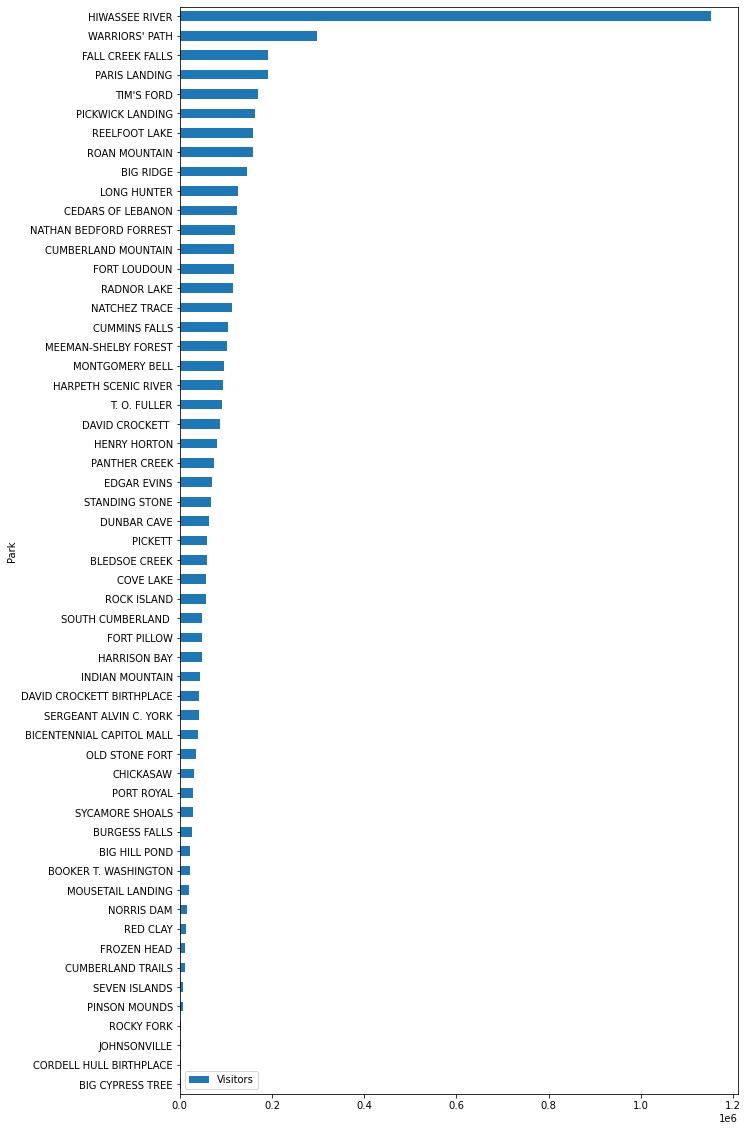

In [12]:
vis1819_y.plot.barh( x = 'Park',figsize=(10,20))

I renamed the Visitors column header to years to begin merging all the years together for easier comparison

In [30]:
merged = pd.merge(vis1920_y, vis1819_y, on="Park")
merged_t = merged.T
merged_t

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
Park,BIG CYPRESS TREE,CORDELL HULL BIRTHPLACE,JOHNSONVILLE,ROCKY FORK,PINSON MOUNDS,SEVEN ISLANDS,CUMBERLAND TRAILS,BIG HILL POND,FROZEN HEAD,NORRIS DAM,...,BIG RIDGE,CEDARS OF LEBANON,NATHAN BEDFORD FORREST,FALL CREEK FALLS,PICKWICK LANDING,LONG HUNTER,PARIS LANDING,REELFOOT LAKE,WARRIORS' PATH,HIWASSEE RIVER
2019/2020,1690,3000,3914,4207,7742,8250,11064,12680,12987,15879,...,132976,136981,147907,151443,152141,155944,161001,166014,316013,685443
2018/2019,2238,2805,3344,3603,6958,7181,11420,22944,11762,14718,...,145372,123594,119402,192221,162902,126224,190490,159655,297208,1153037


<AxesSubplot:xlabel='Park'>

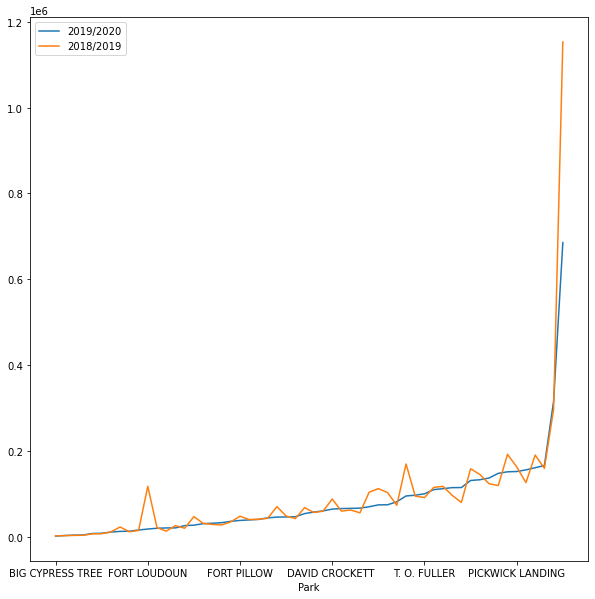

In [34]:
merged.plot.line(x= 'Park',figsize=(10,10))

In [ ]:
filenames = ['../Data/Vis1920.xlsx',]